In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#sns.set_style('whitegrid')
sns.set_style('white')
from scipy.interpolate import interp1d
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [15]:
species_str = {
                'pion': 'pis',
                'kaon' : 'Ks', 
                'proton' : 'ppbar'
}
species_ylim = {
                'pion' : (1e-3, 1e6) , 
                'kaon' : (1e-3, 1e5), 
                'proton' : (1e-2, 1e4),
}

idf_label = {0 : 'Grad', 1: 'C.E.', 2 : 'P.M.', 3 : 'P.B.'}
idf_ls = {0 : '--', 1 : ':'}

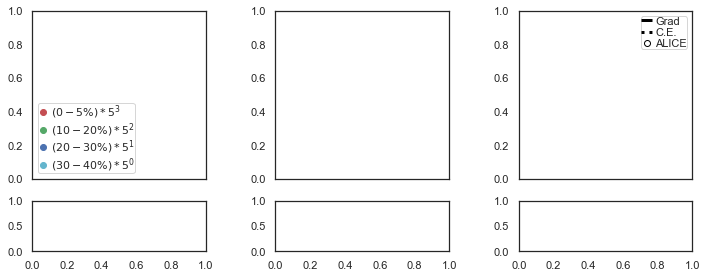

In [27]:
ymax = 1.0 #this is the rapidity cut
cent_bins = [(0, 5), (10, 20), (20, 30), (30, 40)]

height_ratios = [1., 0.3]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,4), sharex=True, gridspec_kw={'height_ratios': height_ratios})
cent_strs = ['0005', '1020', '2030', '3040']
colors = ['r', 'g', 'b', 'c']
species = ['pion', 'kaon', 'proton']
species_short = [r'$\pi$', r'$K$', r'$p$']

for idf in [0, 1]:
    #load the pT bins
    pT_bin_edges = np.loadtxt(idf_label[idf] + '/Predictions/diff_pT_spectra/pT_bin_edges')
    pT_bin_ctr = []
    pT_bin_width = []
    for x, y in zip(pT_bin_edges[0::], pT_bin_edges[1::]): 
        pT_bin_ctr.append( (x+y)/2. )
        pT_bin_width.append(y-x)
    
    #load the pT spectra for pions, kaons, etc...
    spectra = {}
    for s in species:
        spectra[s] = np.loadtxt(idf_label[idf] + '/Predictions/diff_pT_spectra/dN_dpT_' + s)
        #Skip the 5-10% bin, and omit the 40-50, 50-60, ...
        spectra[s] = np.delete(spectra[s], 1, 0)
        spectra[s] = spectra[s][0:4, :]
               
    for col, s in enumerate(species):
        s_short = species_short[col]
        for icent, cent in enumerate(cent_bins):
            dN_dpT = spectra[s][icent, :] / pT_bin_width
            dN_pT_dpT = dN_dpT / pT_bin_ctr
            dN_2pi_pT_dpT = dN_pT_dpT / (2. * np.pi)
            dN_2pi_dy_pT_dpT = dN_2pi_pT_dpT / (2. * ymax)
            #dN_2pi_dy_pT_dpT *= scale_factors[icent]
            
            if idf == 0:
                label = '(' + str(cent[0]) + ' - ' + str(cent[1]) + '%) x 5^' + str(3 - icent)  
                label_ratio = '(' + str(cent[0]) + ' - ' + str(cent[1]) + '%)'
            else:
                label = None
                label_ratio = None
    
            cent_str = cent_strs[icent]
            try:
                file_str = 'spectra_from_JF/spectra_' + species_str[s] +'_PbPb_2760_' \
                            + cent_str + '_ALICE2013.dat'
                expt = pd.read_csv(file_str, skiprows=11, sep='\s+')
                expt_pT = expt['x']
                expt_y = (expt['y+'] + expt['y-'])
                expt_err = np.sqrt( (expt['dy+_sys']**2. + expt['dy-_sys']**2. ) )
            except:
                pass
            
            scale_factors = (np.ones((len(cent_bins))) * 5.0) ** np.arange(3, -1, -1)
            #axes[0][col].plot(pT_bin_ctr, dN_2pi_dy_pT_dpT * scale_factors[icent], label = label, lw=3, 
            #                  color=colors[icent], ls=idf_ls[idf])
            #axes[0][col].errorbar(expt_pT, expt_y * scale_factors[icent], expt_err, 
            #            marker='o', ls='None', markerfacecolor='None', markeredgecolor=colors[icent] )
            #axes[0][col].set_ylabel(r'$dN/2\pi dy p_T dp_T$' + r'[GeV$^{-2}$]')
            #axes[0][col].set_yscale('log')
            #axes[0][col].set_ylim(species_ylim[s] )
            #axes[0][col].set_title(s)
    
            #make an interpolation, to plot the ratio
            #spectra_interp = interp1d(pT_bin_ctr, dN_2pi_dy_pT_dpT)
            #spectra_at_exp = spectra_interp(expt_pT)
            #ratio = spectra_at_exp / expt_y
            #if (icent == 0) or (icent == 3):
            #    axes[1][col].plot(expt_pT, ratio, label=label_ratio, color=colors[icent], ls=idf_ls[idf], lw=3)
            #axes[1][col].set_ylabel(r'JS / ALICE')
            #axes[1][col].set_ylim(0.5, 1.5)
                
        
            #axes[1][col].set_xlabel(r'$p_T$ [GeV]')
            #axes[1][col].set_xlim(0., 3.)


legend_elements = [Line2D([0], [0], marker='o', markeredgecolor='r', 
                          markerfacecolor='r', ls='None', label=r'$(0-5\%) * 5^3$'),
                   Line2D([0], [0], marker='o', markeredgecolor='g', 
                          markerfacecolor='g', ls='None', label=r'$(10-20\%) * 5^2$'),
                   Line2D([0], [0], marker='o', markeredgecolor='b', 
                          markerfacecolor='b', ls='None', label=r'$(20-30\%) * 5^1$'),
                   Line2D([0], [0], marker='o', markeredgecolor='c', 
                          markerfacecolor='c', ls='None', label=r'$(30-40\%) * 5^0$')]

axes[0][0].legend(handles=legend_elements, loc='lower left', borderpad=0, 
               labelspacing=0, handlelength=1, handletextpad=0.2, frameon=True)

legend_elements = [Line2D([0], [0], color='black', ls = '--', lw=3, label='Grad'),
                   Line2D([0], [0], color='black', ls = ':', lw=3, label='C.E.'), 
                   Line2D([0], [0], marker='o', markeredgecolor='black', markerfacecolor='None', ls='None', label='ALICE'), ]
axes[0][2].legend(handles=legend_elements, loc='upper right', borderpad=0, labelspacing=0.1, handlelength=1, handletextpad=0.3)

plt.tight_layout(True)
plt.subplots_adjust(wspace=0.4, hspace=0.2)
fig.align_labels()
plt.savefig('pT_spectra_Pb-Pb-2760.png', dpi=300)
plt.show()